# **Loan Approval Prediction**

## 1. Setup and Data Loading

In [857]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [858]:
File_Path = 'loan_approval_dataset.csv'

In [859]:
df = pd.read_csv(File_Path)
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## 2. Data Exploration and Preprocessing

### 2.1 Data Inspection

In [860]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [861]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [863]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### 2.2 Data Cleaning

In [864]:
df =  df.drop_duplicates()

In [865]:
df = df.dropna(axis = 0)


In [866]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


### 2.3 Feature Engineering and Encoding

In [867]:
df[' loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [868]:
df[' loan_status'].value_counts(normalize=True)

,proportion
loan_status,
Approved,0.62216
Rejected,0.37784


In [869]:
df.select_dtypes(include='object').head()

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected


In [870]:
df.select_dtypes(include=['int64', 'float64']).head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [871]:
df = df.drop('loan_id',axis =1 )
# because from id it can learn wrong patterns

In [872]:
df[' loan_status'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})
df[' education'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df[' self_employed'] = df[' self_employed'].map({' Yes': 1, ' No': 0})

In [873]:
df[' loan_status'].unique()

array([1, 0])

In [874]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [875]:
x = df.drop(columns=[' loan_status'])
y = df[' loan_status']

## 3. Model Training and Evaluation

### 3.1 Logistic Regression

In [876]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [877]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [878]:
y_pred = model.predict(x_test)

### Evaluation of Logistic Regression

Accuracy Score:  0.7985948477751756
Precision Score:  0.7973856209150327
Recall Score:  0.9104477611940298
F1 Score:  0.8501742160278746

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.61      0.69       318
           1       0.80      0.91      0.85       536

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854



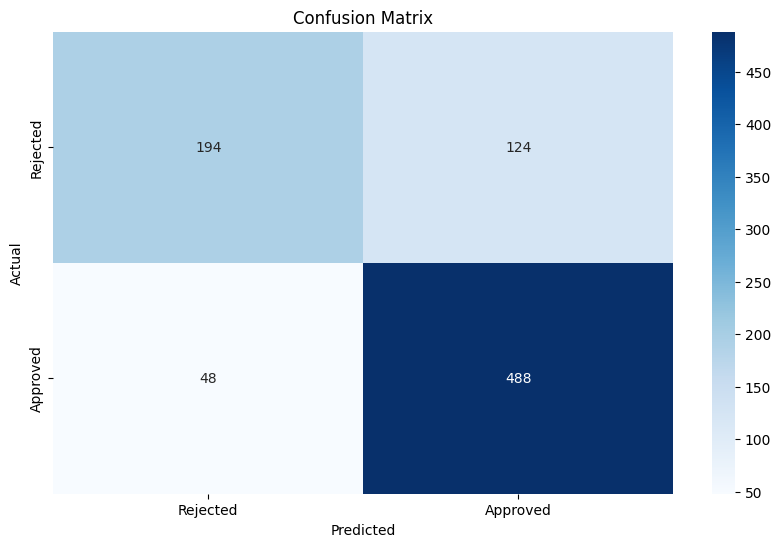

In [879]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('Precision Score: ', precision_score(y_test,y_pred))
print('Recall Score: ', recall_score(y_test,y_pred))
print('F1 Score: ', f1_score(y_test,y_pred))

print('\nClassification Report\n',classification_report(y_test,y_pred))

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Checking Overfitting and Underfitting

In [880]:
train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

print('Training Accuracy: ', train_score)
print('Testing Accuracy: ', test_score)

Training Accuracy:  0.7950219619326501
Testing Accuracy:  0.7985948477751756


### 3.2 Decision Tree

In [881]:
dc_model = DecisionTreeClassifier(max_depth=5,random_state=42)
dc_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [882]:
dc_y_pred = dc_model.predict(x_test)

### Evaluation Of Decision Tree

Accuracy Score:  0.968384074941452
Precision Score:  0.9866156787762906
Recall Score:  0.9626865671641791
F1 Score:  0.9745042492917847

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       318
           1       0.99      0.96      0.97       536

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



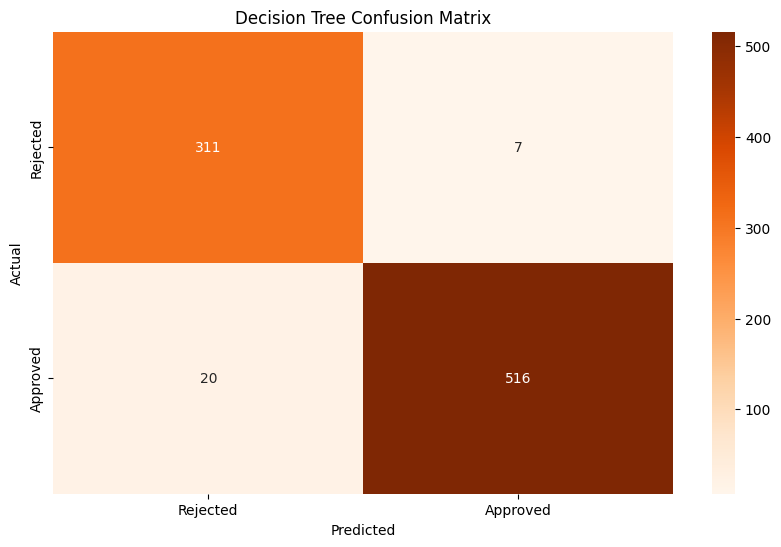

In [883]:
print('Accuracy Score: ', accuracy_score(y_test,dc_y_pred))
print('Precision Score: ', precision_score(y_test,dc_y_pred))
print('Recall Score: ', recall_score(y_test,dc_y_pred))
print('F1 Score: ', f1_score(y_test,dc_y_pred))

print('\nClassification Report\n',classification_report(y_test,dc_y_pred))

plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, dc_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Checking For Overfitting or Underfitting

In [884]:
dc_train_score = dc_model.score(x_train,y_train)
dc_test_score = dc_model.score(x_test,y_test)

print('Training Accuracy: ', dc_train_score)
print('Testing Accuracy: ', dc_test_score)

Training Accuracy:  0.9756954612005857
Testing Accuracy:  0.968384074941452


### 3.3 Model Comparison

In [885]:
print('Logistic Regression Model')
print('Training Accuracy: ', train_score)
print('Testing Accuracy: ', test_score)

print('\nDecision Tree Model')
print('Training Accuracy: ', dc_train_score)
print('Testing Accuracy: ', dc_test_score)

Logistic Regression Model
Training Accuracy:  0.7950219619326501
Testing Accuracy:  0.7985948477751756

Decision Tree Model
Training Accuracy:  0.9756954612005857
Testing Accuracy:  0.968384074941452
